<a href="https://colab.research.google.com/github/lauragoon/Face-Mask-Detector/blob/main/knn_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import tensorflow as tf
import numpy as np
from keras.preprocessing import image
from keras.applications.resnet50 import ResNet50, preprocess_input
from keras.layers import Dense, Reshape
from keras.models import Model
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import pandas as pd


In [3]:
import tensorflow as tf
from keras.preprocessing import image

def get_data(batch_size, directory):
  
  datagen = image.ImageDataGenerator()
  dta = datagen.flow_from_directory(directory, 
                                    class_mode='binary', 
                                    batch_size=batch_size)

  return dta

In [4]:
def knn(model, output_size):
    vector = np.prod(model.output_shape[1:])
    x = Reshape(target_shape=(vector,))(model.output)
    x = Dense(units=output_size, activation='linear', use_bias=False)(x)             
    knn_model = Model(inputs=[model.input], outputs=x)
    return knn_model

In [5]:
def normalize_vectors(vectors):
    norms = np.linalg.norm(vectors, axis=0)
    return vectors / norms

In [6]:
## generate data
train_path = 'drive/Shared drives/DSCI 303 Final Project/ImageDataset2/training'
test_path = 'drive/Shared drives/DSCI 303 Final Project/ImageDataset2/test'

train_data = get_data(200, train_path)
train_batch_images, train_batch_class = train_data.next()

print('finished generating batches')

## pre-trained neural network to extract features
nn_model = ResNet50(input_shape=(256,256,3),
                    weights='imagenet',
                    include_top=False,
                    pooling='avg')

## feature extraction
img_features = nn_model.predict(train_batch_images).T

print('finished feature extraction')

## create knn model
joined_model = knn(nn_model, img_features.shape[1])

## normalize features
norm_img_features = normalize_vectors(img_features)

## set model weights
weights = joined_model.get_weights()
weights[-1] = norm_img_features
joined_model.set_weights(weights)



Found 6804 images belonging to 2 classes.
finished generating batches
finished feature extraction


1.0
1.0
1.0


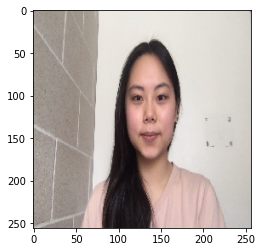

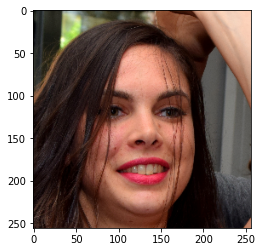

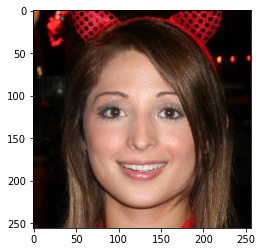

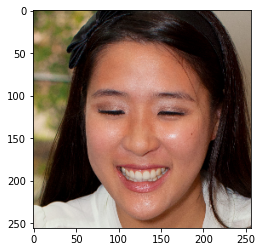

In [10]:
from keras.preprocessing import image
from keras.preprocessing.image import load_img, img_to_array, array_to_img
from keras.applications.resnet50 import ResNet50, preprocess_input

k = 3

im = np.array(img_to_array(load_img('drive/MyDrive/claire_1.jpg', target_size=(256,256))))
plt.figure()
plt.imshow(im.astype('uint8'))

im = np.expand_dims(im, axis=0)
im = preprocess_input(im)
result = joined_model.predict(im).reshape(-1)
result_idx = result.argsort()[-k:][::-1]


for i in result_idx:
  plt.figure()
  plt.imshow(train_batch_images[i].astype('uint8'))
  print(train_batch_class[i])


